Estatística descritiva - Exercício
==================================
<h2>Discentes: Eric Leandro e José David<h2>


## Objetivo



Faça uma análise exploratória do conjunto de dados que você recebeu. Para isso, compute estatísticas descritivas dos dados e escolha algumas variáveis para representar graficamente. Com as informações obtidas, escreva um texto sobre o que observou.



<h2>Métodos:</h2>
</br1>

Inicialmente, as bibliotecas necessárias foram importadas e tiveram suas abreviações definidas.

In [2]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt 

In [74]:
Tabela = pd.read_excel("questionario.xlsx")


#Dados quantitativos
alturas = "Qual é a sua altura em centímetros?\n"
tamanhos_sapato = "Qual é o número de sapato que você calça?\n"
n_irmaos = "Quantos irmãos você tem?\n"
aniversarios = "Qual o mês do seu aniversário?\n"
livros_ano_passado = "Quantos livros você leu ano passado?\n"

#Dados qualitativos ordinários:
opinioes_azeitona = "Qual a sua opinião sobre azeitona?\n"

#Dados qualitativos nominais:
cores = "Das cores abaixo, qual é a sua favorita (ou a cor que mais gosta se sua cor favorita mesmo não estiver na lista)?\n"
afinidades = "Qual destas linhas de estudo é a que você tem mais afinidade?\n"
desafinidades = "Qual destas linhas de estudo é a que você tem menos afinidade?\n"
cats_dogs = "Cachorros ou gatos?\n"

Com o objetivo de identificar discrepâncias presentes nos dados, é necessário considerar que tipo de dado cada coluna se trata, conferir os intervalos númericos possíveis, buscar os dados que fogem do intervalo e decidir uma forma de corrigí-los. 
Os dados de altura, tamanho de sapato, número de irmãos, mês de aniversário e livros lidos no último ano são quantitativos. Todos esses se limitam a números positivos, mas se diferem com relação ao quantitativo permitido.
Para limtar a altura, consideramos a altura da maior e da menor pessoa do mundo<sup>[1]</sup>. Para limitar o mês de aniversário consideramos um intervalo de 1 a 12. Com relação ao número de livros, apenas foi estabelecido um limite para que nao houvessem valores negativos.

In [45]:
falhas_altura = []
falhas_sapato = []
falhas_n_irmaos = []
falhas_mes= []
falhas_livros_ano_passado= []

for altura in Tabela[alturas]:
    if altura < 54 or altura > 340:
        falhas_altura.append(altura)

for tamanho_sapato in Tabela[tamanhos_sapato]:
    if tamanho_sapato < 20 or tamanho_sapato > 60:
        falhas_sapato.append(tamanho_sapato)

for livro_ano_passado in Tabela[livros_ano_passado]:
    if  livro_ano_passado < 0:
        falhas_n_irmaos.append(livro_ano_passado)

for n_irmao in Tabela[n_irmaos]:
    if  n_irmao < 0  or n_irmao > 102:
        falhas_n_irmaos.append(n_irmao)

for aniversario in Tabela[aniversarios]:
    if  aniversario < 1  or aniversario > 12:
        falhas_mes.append(aniversario)



print("Outliers de altura:",falhas_altura)
print("Outliers do tamanho de sapato:",falhas_sapato)
print("Outliers de número de livros:",falhas_livros_ano_passado)
print("Outliers de número de irmãos:",falhas_n_irmaos)
print("Outliers de aniversários:",falhas_mes)

        

Outliers de altura: [17.0, 1545.0, 1.71]
Outliers do tamanho de sapato: []
Outliers de número de livros: []
Outliers de número de irmãos: []
Outliers de aniversários: []


In [115]:
def mmmd(coluna):

    media = st.mean(Tabela[coluna])
    mediana = st.median(Tabela[coluna])
    moda = st.mode(Tabela[coluna])
    desvio_padrao = st.pstdev(Tabela[coluna])

    dados = print(f"Moda de {moda}, mediana de {mediana}, moda de {moda}, desvio padrão de {desvio_padrao}")

    return dados


mmmd(tamanhos_sapato)

Moda de 40, mediana de 40, moda de 40, desvio padrão de 3.1497485158023597


Considerando que as descrepâncias apenas apareceram na coluna de altura, então apenas precisamos corrigir esta.

<h4>Para visualizar melhor a relação dos dados qualitativos nominais, a plotagem deles foi feita usando a função de gráfico de pizza do matplotlib. 

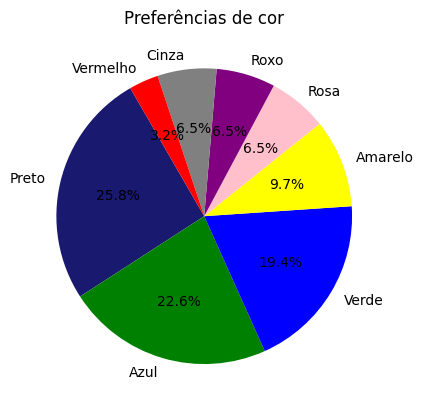

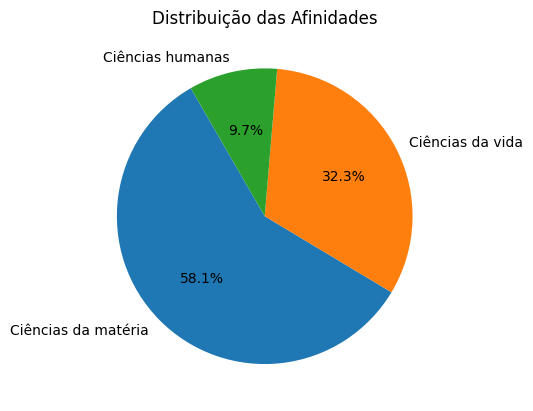

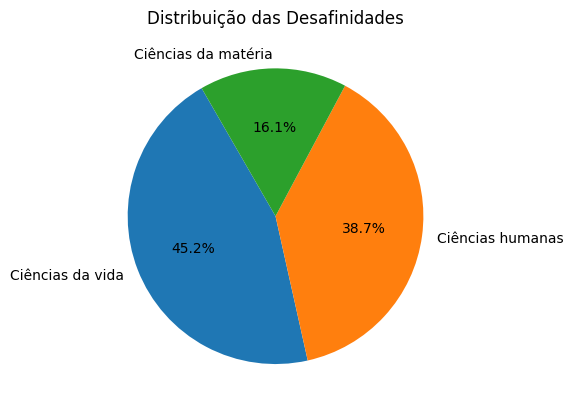

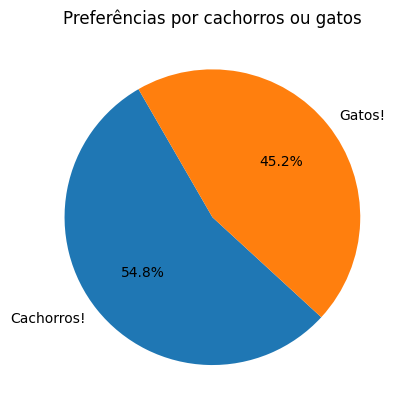

In [102]:
#tste
cores_counts = Tabela[cores].value_counts()
custom_colors = ['midnightblue','green','blue','yellow','pink','purple','gray','red']
plt.pie(cores_counts, labels=cores_counts.index, autopct='%1.1f%%', startangle=120,colors=custom_colors)
plt.title('Preferências de cor')
plt.show()

afinidades_counts = Tabela[afinidades].value_counts()
plt.pie(afinidades_counts, labels=afinidades_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribuição das Afinidades')
plt.show()

desafinidades_counts = Tabela[desafinidades].value_counts()
plt.pie(desafinidades_counts, labels=desafinidades_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribuição das Desafinidades')
plt.show()

cao_gato = Tabela[cats_dogs].value_counts()
plt.pie(cao_gato, labels=cao_gato.index, autopct='%1.1f%%', startangle=120)
plt.title('Preferências por cachorros ou gatos')
plt.show()


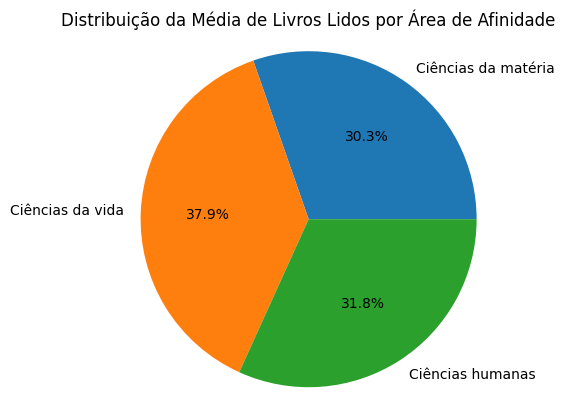

In [15]:
grafico = Tabela.groupby(afinidades)[livros_ano_passado].mean().reset_index()

plt.pie(grafico[livros_ano_passado], labels=grafico[afinidades], autopct='%1.1f%%')
plt.title('Distribuição da Média de Livros Lidos por Área de Afinidade')
plt.axis('equal')
plt.show()

In [85]:
vida_n=[]
materia_n = []
humanas_n = []
for i in range(1,30):
    if Tabela[afinidades][i] == "Ciências da vida":
        vida_n.append(Tabela[desafinidades][i])
    if Tabela[afinidades][i] == "Ciências da matéria":
        materia_n.append(Tabela[desafinidades][i])
    if Tabela[afinidades][i] == "Ciências da humanas":
        humanas_n.append(Tabela[desafinidades][i])


vida_n.count("Ciências da matéria")
vida_n.count("Ciências da vida")
vida_n.count("Ciências da humanas")

0

## Resultado e discussão



A partir dos métodos mostrados as seguintes determinaçãoes podem ser feitas:



## Referências



Escreva nesta seção as referências consultadas.



## Playground

